# EDA - Ejemplo - Titanic

**Contexto**  
Este conjunto de datos es muy famoso y contiene si un pasajero sobrevivió o no, de acuerdo a las características propias del mismo.

**Contenido**  
El conjunto de datos proviene de kaggle: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data).  
Está dividido en 2 conjuntos de datos: train.csv (891 renglones) y test.csv (418 renglones) con las siguientes columnas:  

| Variable    | Definición                            | Valor                                         |
| ----------- | ------------------------------------- | --------------------------------------------- |
| PassengerId | Identificador del pasajero            | Id numérico                                   |
| Survived    | Supervivencia **(variable objetivo)** | 0 = No, 1 = Sí                                |
| Pclass      | Clase del boleto                      | 1 = 1era, 2 = 2da, 3 = 3ra                    |
| Name        | Nombre del pasajero                   | String                                        |
| Sex         | Sexo                                  | male / female                                 |
| Age         | Edad                                  | Años                                          |
| SibSp       | Hermanos / esposas a bordo            | Número                                        |
| Parch       | Padres / hijos a bordo                | Número                                        |
| Ticket      | Identificador del ticket              | String                                        |
| Fare        | Tarifa                                | GBP                                           |                    
| Cabin       | Identificador de la cabina            | String                                        |
| Embarked    | Puerto de embarque                    |C = Cherburgo, Q = Queenstown, S = Southampton |

**Planteamiento del problema**  
Se busca predecir que características tuvieron más impacto en la supervivencia de los pasajeros.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar Datos

In [2]:
# Importar los datos
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Renombrar columnas
train.columns = ['id_pasajero', 'sobrevivió', 'clase', 'nombre', 'sexo', 'edad', 'hermanos', 'padres', 'id_ticket', 'tarifa', 'cabina', 'puerto']

In [4]:
# Seleccionar columnas a utilizar
train = train[['clase', 'sexo', 'edad', 'hermanos', 'padres', 'tarifa', 'cabina', 'puerto', 'sobrevivió']]

## EDA

### Análisis Inicial

In [5]:
# Revisar los datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clase       891 non-null    int64  
 1   sexo        891 non-null    object 
 2   edad        714 non-null    float64
 3   hermanos    891 non-null    int64  
 4   padres      891 non-null    int64  
 5   tarifa      891 non-null    float64
 6   cabina      204 non-null    object 
 7   puerto      889 non-null    object 
 8   sobrevivió  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<Axes: >

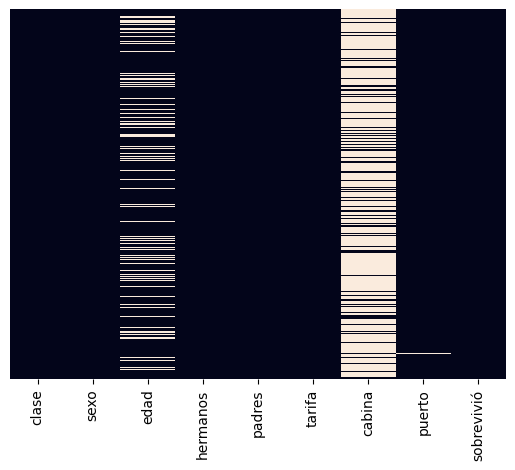

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

* Para el campo de **edad**, falta aproximadamente el 20% de los datos  
    * Dado que la proporción de datos faltantes es pequeña, generaremos un reemplazo razonable, mediente alguna forma de imputación
* Para el campo de **cabina**, faltan demasiados datos para hacer algo útil, de manera rápida
    * Por el momento, estaremos eliminando esta variable

In [7]:
train.describe()

,clase,edad,hermanos,padres,tarifa,sobrevivió
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


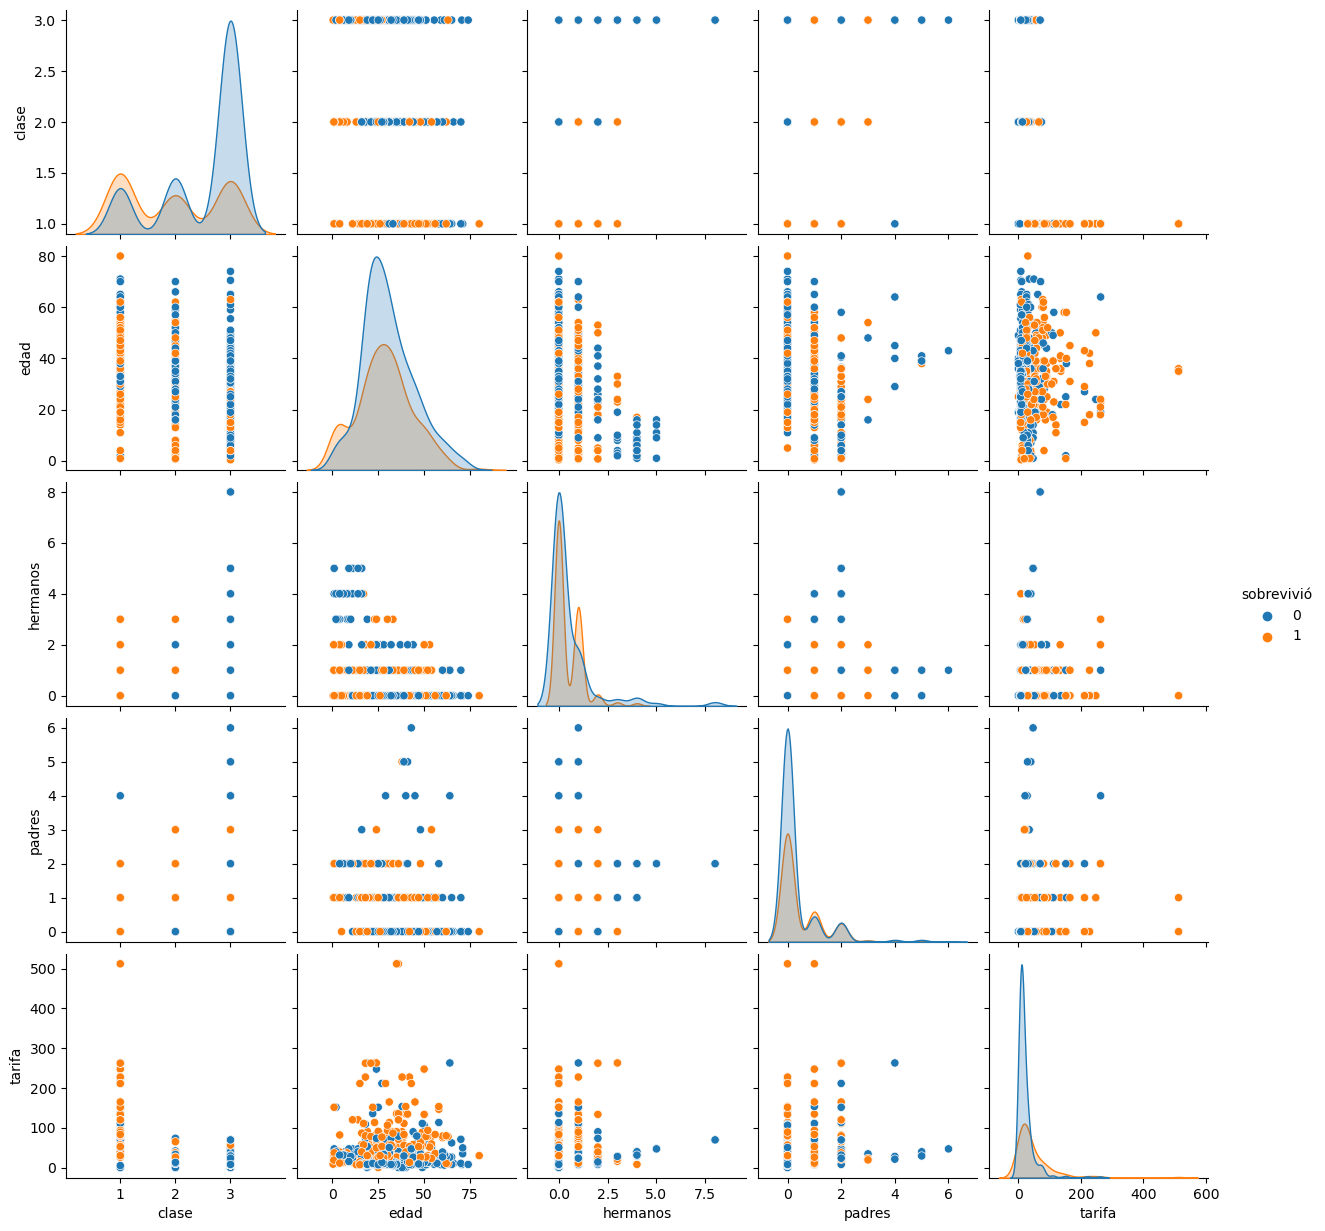

In [8]:
# Revisar las relaciones entre los datos
sns.pairplot(train, hue='sobrevivió')

C:\Users\csameshima\AppData\Local\Temp\ipykernel_15992\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

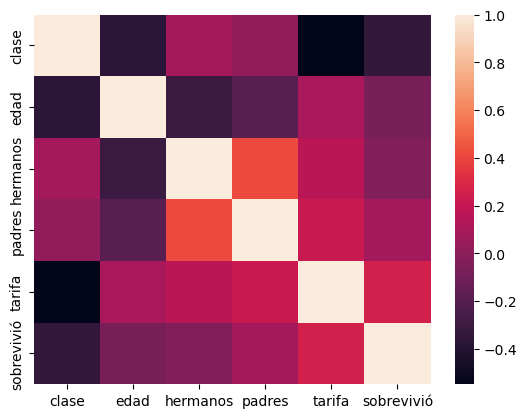

In [9]:
sns.heatmap(train.corr())

<Axes: xlabel='sobrevivió', ylabel='count'>

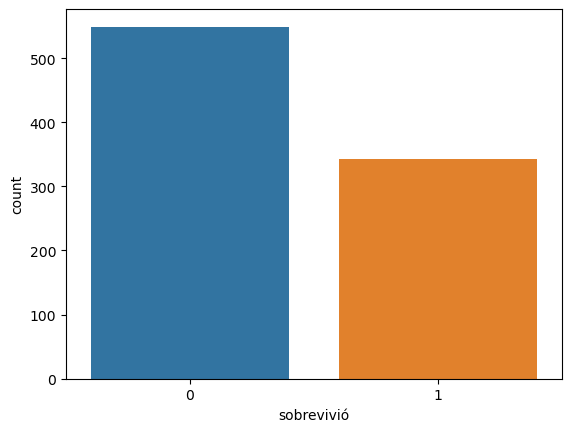

In [10]:
# Revisar la distribución de la variable objetivo
sns.countplot(x='sobrevivió', data=train)

<Axes: xlabel='sobrevivió', ylabel='count'>

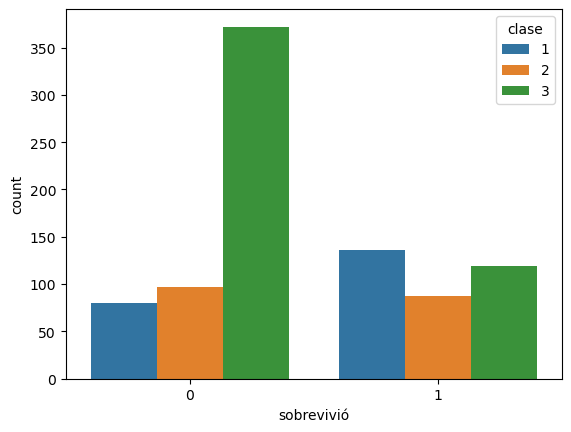

In [11]:
# Revisar la distribución por clase
sns.countplot(x='sobrevivió', data=train, hue='clase')

Podemos ver que la mayoría de los que no sobrevivieron pertenecen a la 3a clase y la mayoría de los que sobrevivieron pertenecen a la 1a clase.  
¿Tiene sentido?

<Axes: xlabel='sobrevivió', ylabel='count'>

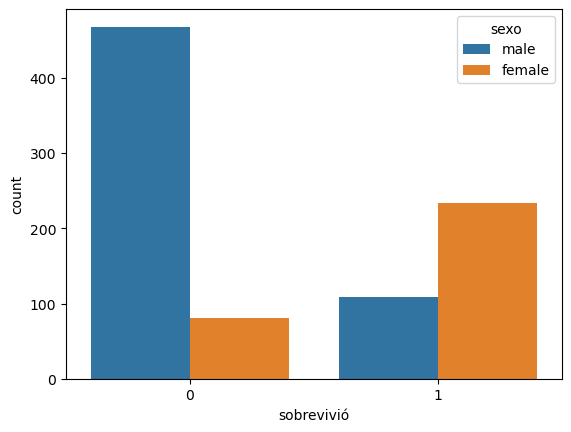

In [12]:
# Revisar la distribución por sexo
sns.countplot(x='sobrevivió', data=train, hue='sexo')

Podemos ver que la mayoría de los que no sobrevivieron son hombres y la mayoría de los que sobrevivieron son mujeres.  
¿Tiene sentido?

### Limpieza de Datos

Empecemos por completar las edades faltantes.  
* En lugar de borrar la variable, podemos reemplazar los fatantes por la edad media
* Podemos hacer un análisis más a fondo y utilizar la edad promedio por clase

<Axes: xlabel='clase', ylabel='edad'>

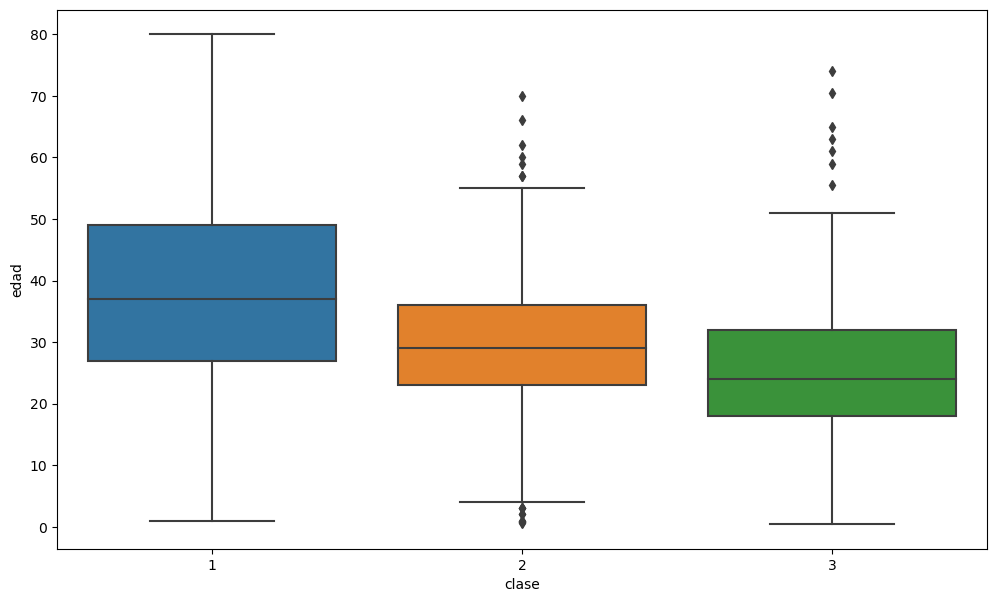

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='clase', y='edad', data=train)

Podemos ver que los pasajeros en las clases altas, tienden a ser mayores.  
Utilizaremos estos valores promedio, para imputarlos según la clase.
* El valor se imputará de manera manual, para no complicar el cálculo

In [14]:
def imputar_edad(cols):
    edad = cols[0]
    clase = cols[1]
    
    if pd.isnull(edad):
        if clase == 1:
            return 37
        elif clase == 2:
            return 29
        else:
            return 24
    else:
        return edad

In [15]:
train['edad'] = train[['edad','clase']].apply(imputar_edad, axis=1)

In [16]:
# Revisar de nuevo los datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clase       891 non-null    int64  
 1   sexo        891 non-null    object 
 2   edad        891 non-null    float64
 3   hermanos    891 non-null    int64  
 4   padres      891 non-null    int64  
 5   tarifa      891 non-null    float64
 6   cabina      204 non-null    object 
 7   puerto      889 non-null    object 
 8   sobrevivió  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Eliminemos la columna de la cabina

In [17]:
train.drop('cabina',axis=1,inplace=True)

In [18]:
# Revisar de nuevo los datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clase       891 non-null    int64  
 1   sexo        891 non-null    object 
 2   edad        891 non-null    float64
 3   hermanos    891 non-null    int64  
 4   padres      891 non-null    int64  
 5   tarifa      891 non-null    float64
 6   puerto      889 non-null    object 
 7   sobrevivió  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Eliminemos los renglones que tienen nulos en la variable de puerto

In [19]:
train.dropna(inplace=True)

In [20]:
# Revisar de nuevo los datos
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clase       889 non-null    int64  
 1   sexo        889 non-null    object 
 2   edad        889 non-null    float64
 3   hermanos    889 non-null    int64  
 4   padres      889 non-null    int64  
 5   tarifa      889 non-null    float64
 6   puerto      889 non-null    object 
 7   sobrevivió  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB
